# Clustering vectors by k-means in Python

### Overview
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

It is an unsupervised machine learning approach to classifying data. The algorithm is non-deterministic and as such (apart from unit testing the underlying software components) there are 2 methods to test for best k; 1: silhouette, and, 2: elbow & sum of squared error.

### Environment
I implemented a solution in `Anaconda` environment with `Python 3.8.5` as this is essentially 'data-science'.

### Algorithm pseudo-code

```
1. Assign `k` clusters to assign.
2. Randomly initialize k centroids.
3. REPEAT (_Until centroid positions do not change_):
    3a. **expectation**: Assign each point to it's the closest centroid.
    3b. **maximization**: Compute new centroid for the cluster.
```

### Related Git
https://dev.azure.com/Rose-Software-Ltd/KMeansClusteringPython


## Demonstration setup

You can choose a value for k which will; a: create k centers to randomly place vectors around, and, b: tell the algorithm how many cluster to group by. Use the slide to select a value for k.

In [1]:
#!/usr/bin/env python3.8.5
# Copyright 2020, Rose Software Ltd, All rights reserved.

#Project imports.
from my_k_means.k_means_clustering import KMeans

# Third party imports.
import matplotlib.pyplot as matplot
import ipywidgets as widgets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Choose k.
layout = widgets.Layout(width='auto', height='50px', ) #set width and height
k_selector = widgets.IntSlider(min=0, max=20, step=1, description='k selector:', value=5, layout=layout)
display(k_selector)

# Choose number of vectors.
layout = widgets.Layout(width='auto', height='50px', ) #set width and height
n_vectors = widgets.IntSlider(min=0, max=500, step=50, description='n vectors:', value=200, layout=layout)
display(n_vectors)


IntSlider(value=5, description='k selector:', layout=Layout(height='50px', width='auto'), max=20)

IntSlider(value=200, description='n vectors:', layout=Layout(height='50px', width='auto'), max=500, step=50)

## Generate vectors

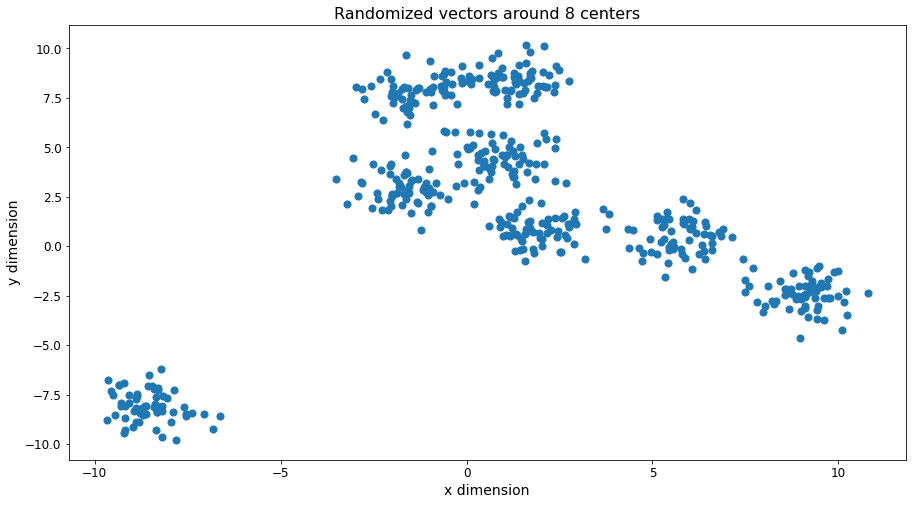

In [10]:
# Asssign k and n.
k = k_selector.value
n = n_vectors.value

# Generate identical data set.
vectors, y_true = make_blobs(n_samples=n, centers=k, cluster_std=0.75, random_state=0)

# Setup the graph.
matplot.figure(figsize=(15, 8))
matplot.title(f'Randomized vectors around {k} centers', fontsize=16)
matplot.xlabel(f'x dimension', fontsize=14)
matplot.ylabel(f'y dimension', fontsize=14)

# Plot the graph.
matplot.scatter(vectors[:, 0], vectors[:, 1], s=50)


## Run my implementation of k means

The centers are the black spots and the vectors are assigned a colour for their cluster group. The cluster number is plotting near the centroid vector.

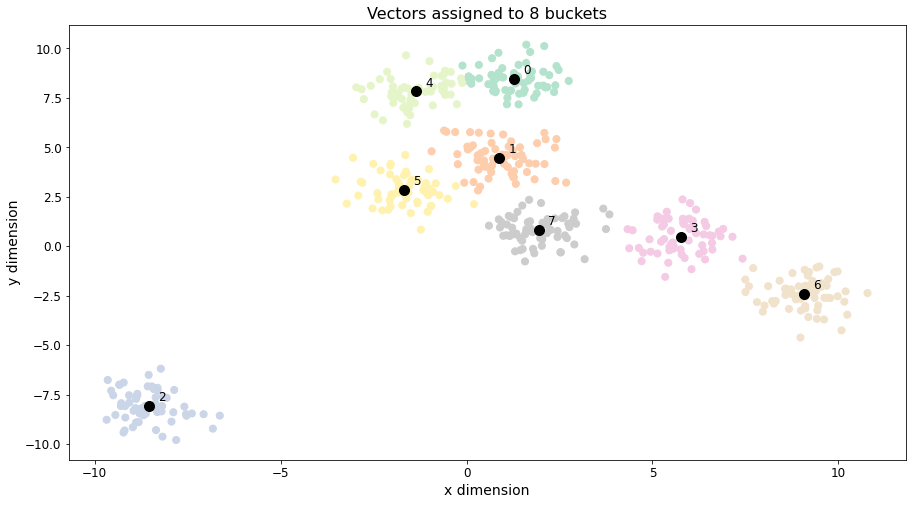

In [12]:
# Instantiate my class.
my_km = KMeans()

# Run k means clustering.
centroids, labels = my_km.get_clusters(k=k, vectors=vectors)

# Setup the graph.
matplot.figure(figsize=(15, 8))
matplot.title(f'Vectors assigned to {k} buckets', fontsize=16)
matplot.xlabel(f'x dimension', fontsize=14)
matplot.ylabel(f'y dimension', fontsize=14)

# Plot the data.
matplot.scatter(vectors[:, 0], vectors[:, 1], s=50, c=labels, cmap='Pastel2')

# Plot the centers.
matplot.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=1)

# Assign bucket numbers.
for i, c in enumerate(centroids):
    matplot.text(c[0]+0.25, c[1]+0.25, i)


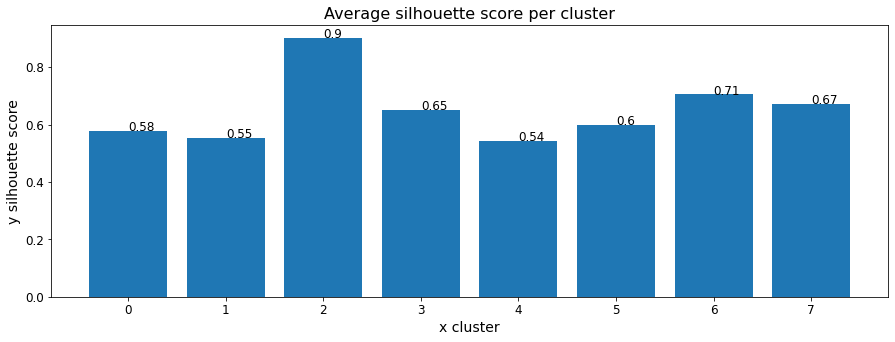

In [13]:
# Calculate the silhouette coefficients.
silhouettes, pairs = my_km.get_silhouette_coefficient(vectors, labels, centroids)

# Setup the graph.
matplot.figure(figsize=(15, 5))
matplot.title(f'Average silhouette score per cluster', fontsize=16)
matplot.xlabel(f'x cluster', fontsize=14)
matplot.ylabel(f'y silhouette score', fontsize=14)
font = {'size': 12}
matplot.rc('font', **font)

# Plot the graph.
matplot.bar(
    range(0, len(silhouettes)),
    [ sum(x) / len(x) for x in silhouettes ])

# Add labels for the columns.
for i in range(0, len(silhouettes)):
    b = matplot.annotate(
        text=str(round(sum(silhouettes[i]) / len(silhouettes[i]), 2)),
        xy=(i, sum(silhouettes[i]) / len(silhouettes[i])))


## Comparing my implementation of the silhouette coefficient with sklearn
When comparing my implementation of silhouette coefficient calculations to those included in the sklearn module there is a minute difference of ~0.01 or a 1:200 (the range being -1 to 1).

In [5]:
# Test my get_silhouette implementation by comparing to sklearn.
z = [ s for l in silhouettes for s in l ]
print(f"My method: {sum(z) / len(z)}")

score = silhouette_score(vectors, labels, metric='euclidean')
print(f"Sklearn method: {score}")

My method: 0.6617057368217426
Sklearn method: 0.6447653077279003


## Automatically finding best k
What if we want to automatically find the best fitting k for the dataset? Rather than supplying `k`, call `get_best_fit` in my instance of `KMeans`.

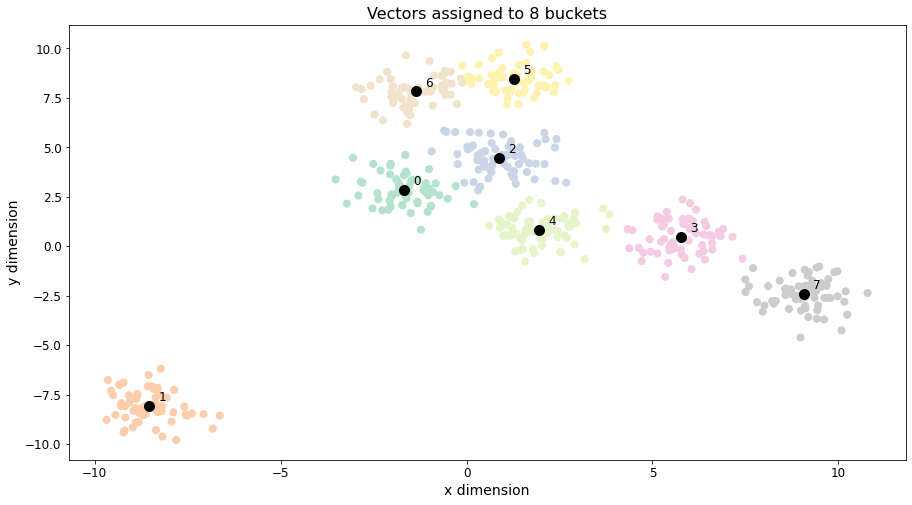

In [14]:
# Instantiate my class.
my_km = KMeans()

# Run k means clustering.
k, centroids, labels = my_km.get_best_fit(vectors=vectors)

# Setup the graph.
matplot.figure(figsize=(15, 8))
matplot.title(f'Vectors assigned to {k} buckets', fontsize=16)
matplot.xlabel(f'x dimension', fontsize=14)
matplot.ylabel(f'y dimension', fontsize=14)

# Plot the data.
matplot.scatter(vectors[:, 0], vectors[:, 1], s=50, c=labels, cmap='Pastel2')

# Plot the centers.
matplot.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=1)

# Assign bucket numbers.
for i, c in enumerate(centroids):
    matplot.text(c[0]+0.25, c[1]+0.25, i)
    


Get the silhouette scores for the chart above. As the number of vectors grows, so does the discrepancy between my silhouette calculation and that of sklearn. It is stated in their documentation that they use a **euclidean_distances** formula which is optimized for speed but is less precise, could this be the difference?

https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/metrics/pairwise.py#L589

In [15]:
for i in range(0, len(my_km.silhouette_scores)):
    s = my_km.silhouette_scores[i]
    l = my_km.cluster_centroids_labels[i]
    x = 0
    z = 0
    for c in s[0]:
        x += sum(c)
        z += len(c)
    print(my_km.get_silhouette_summary(i))
    print(silhouette_score(vectors, l[1], metric='euclidean'))
    print('---')

0.41814589228136906
0.41592998043441387
---
0.5982862430900936
0.5962559820331271
---
0.5984390037117402
0.5795661308867726
---
0.6109022937247264
0.5658603453517547
---
0.4922244517012233
0.4652557852258196
---
0.5944650514637132
0.5616727243810092
---
0.6501870056779439
0.625874964397009
---
0.5149169027753333
0.47963446586998193
---
0.537966230225346
0.5115172700704543
---
